<a href="https://colab.research.google.com/github/ranu-agrawal/MLnow_2.0/blob/main/student-dataset/Univariate_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: Jun 11, 2021


**Author**:
 Ranu Agrawal

 **Mentor**: Shivani Shimpi

**Reach out**:
[GitHub](https://github.com/ranu-agrawal) | [LinkedIn](https://www.linkedin.com/in/ranu-agrawal/) | [Email](mailto:ranuagrawal0983@gmail.com)



Feel free to check out my [website](http://ranu-agrawal.netlify.app) for more information about me

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/student'

/content/drive/MyDrive/student


In [ ]:
ls

02_ExploratoryDataAnalysis.ipynb  student-merge.R  student.txt
student-mat.csv                   student-por.csv  Untitled0.ipynb


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [ ]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [ ]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [ ]:
ls

02_ExploratoryDataAnalysis.ipynb  student-por.csv            Untitled0.ipynb
student-mat.csv                   student.txt
student-merge.R                   univariate_MathData_2.csv


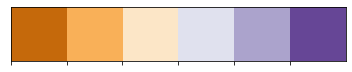

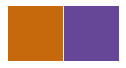

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

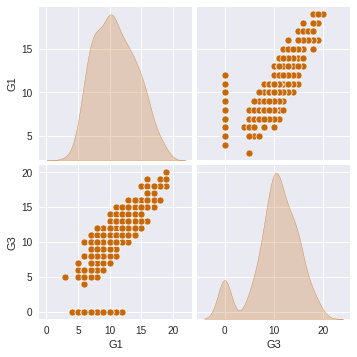

In [ ]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [ ]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [ ]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 20ms/step - loss: 28.4516 - mae: 28.4516 - mse: 900.4429 - val_loss: 30.1181 - val_mae: 30.1181 - val_mse: 1006.3026
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 28.3339 - mae: 28.3339 - mse: 893.1356 - val_loss: 29.9936 - val_mae: 29.9936 - val_mse: 998.1595
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 28.2167 - mae: 28.2167 - mse: 885.9504 - val_loss: 29.8689 - val_mae: 29.8689 - val_mse: 990.0327
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 28.0993 - mae: 28.0993 - mse: 878.7492 - val_loss: 29.7442 - val_mae: 29.7442 - val_mse: 981.9471
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 27.9819 - mae: 27.9819 - mse: 871.6134 - val_loss: 29.6197 - val_mae: 29.6197 - val_mse: 973.9021
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 27.8645 - mae: 27.8645 - mse: 864.4952 - val_loss: 29.4953 - val_mae: 

In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


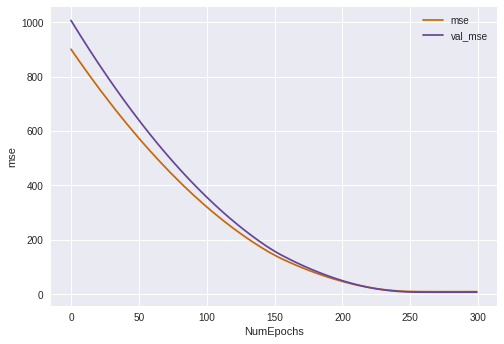

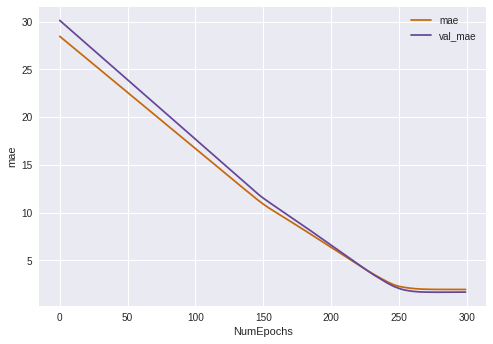

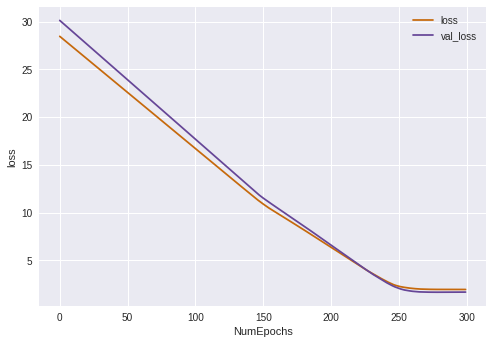

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[3.192122]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[3.192122]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[3.192122 ]
 [3.9898515]
 [4.7875805]
 [5.58531  ]
 [6.3830395]]

List of Predictions (flattened out):
[3.192122  3.9898515 4.7875805 5.58531   6.3830395]



In [ ]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

79
[13.562605   7.180769  11.169416  15.955793  15.955793  11.967146
 13.562605  17.551252  17.551252   8.776228  13.562605  12.764875
  8.776228   7.9784985  9.573957  12.764875  11.169416  15.158064
  7.9784985 10.371687  14.360334  12.764875  13.562605  15.158064
  7.9784985  7.9784985  8.776228  10.371687  11.967146  10.371687
 11.967146  12.764875  10.371687   7.180769   9.573957  11.967146
  7.9784985  8.776228  13.562605   9.573957   9.573957   7.9784985
 11.967146   7.180769  12.764875   7.9784985  7.9784985 11.169416
 12.764875  15.955793  11.967146  14.360334   9.573957  11.967146
 14.360334  11.967146  14.360334  11.967146  14.360334  11.169416
 11.967146   8.776228  15.158064   7.9784985 15.158064  11.169416
 15.158064  12.764875   8.776228   8.776228  11.967146  16.753523
 12.764875  15.158064  10.371687   7.9784985 10.371687   7.9784985
 11.169416 ]


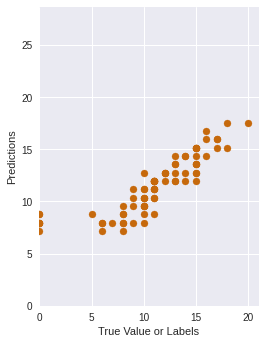

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

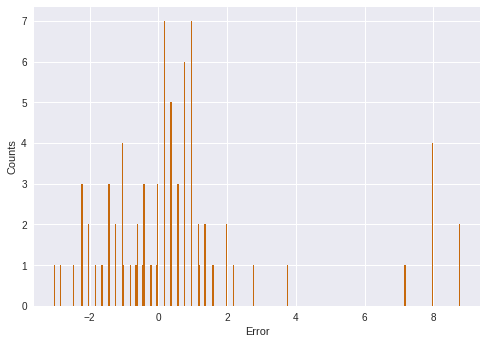

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)